In [ ]:
## Authors: Lina Hammargren and Wei Wu, Assignment 2

In [ ]:
################ QUESTION 1 ################

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

df=pd.read_csv("data_assignment2.csv")

df_len=len(df)
print(df_len) # 56 data points

56


In [ ]:
print(df.head())
#print(df)

   ID  Living_area  Rooms  Land_size  Biarea  Age  Selling_price
0   1          104    5.0      271.0    25.0   33        4600000
1   2           99    5.0     1506.0     6.0   88        4450000
2   3          133    6.0      486.0     NaN   44        4900000
3   4          175    7.0      728.0     NaN   14        6625000
4   5          118    6.0     1506.0     NaN   29        4600000


<function matplotlib.pyplot.show(*args, **kw)>

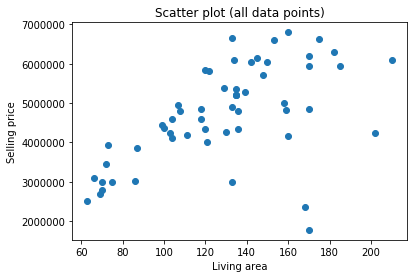

In [ ]:
plt.scatter(df['Living_area'], df['Selling_price'])
plt.xlabel("Living area")
plt.ylabel("Selling price")
plt.title("Scatter plot (all data points)")
plt.show



In [ ]:
## Question 1 a

y=np.array(df['Selling_price'])
x=np.array([[i] for i in df['Living_area']])

In [ ]:
# Linear regression model
model = LinearRegression().fit(x, y)

Text(0, 0.5, 'Selling price')

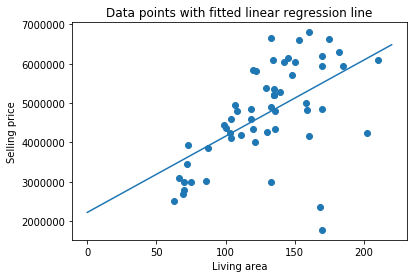

In [ ]:
# Plot of the regression line
xfit = np.linspace(0, df['Living_area'].max()+10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.title("Data points with fitted linear regression line")
plt.xlabel("Living area")
plt.ylabel("Selling price")

In [ ]:
## Question 1 b

# Intercept
intercept=model.intercept_

# Slope
slope=model.coef_

print("Intercept: "+intercept.astype(str))
print("Slope: "+slope[0].astype(str))

Intercept: 2220603.243355869
Slope: 19370.13854733158


In [ ]:
## Question 1 c

preds=[[i, model.predict([[i]])[0]] for i in [100, 150, 200]]

# just creates Latex table code
df=pd.DataFrame(preds)
df.to_latex(index=False)

print(preds)

[[100, 4157617.0980890268], [150, 5126124.025455605], [200, 6094630.952822184]]


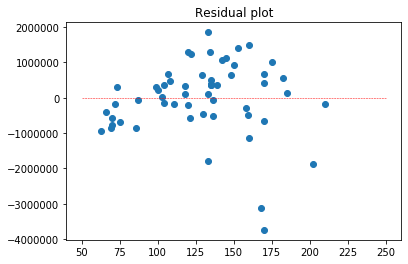

Looking at the plot we can see that the residuals are not horizontally evenly distributed around the line at 0. There seems to be at least two outliers.


In [ ]:
## Question 1 d (residual plot)
ypred = model.predict(x)
residuals=y-ypred
residuals

# Residual plot
plt.scatter(x, residuals)
plt.plot(np.linspace(50, 250, 1000), np.zeros(1000),'--', linewidth=0.5, c='red')
plt.title("Residual plot")
plt.show()

print("Looking at the plot we can see that the residuals are not horizontally evenly distributed around the line at 0. There seems to be at least two outliers.")

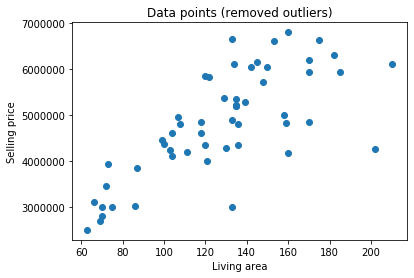

In [ ]:
## Now we try again removing the two outliers

df2=pd.read_csv("data_assignment2.csv")

# find the two outliers
outliers=np.where(residuals<-3000000)
x_mod=df2['Living_area'].drop(outliers[0], axis=0)
y_mod=df2['Selling_price'].drop(outliers[0], axis=0)
x_mod=np.array([[i] for i in x_mod])
y_mod=np.array(y_mod)
plt.scatter(x_mod, y_mod)
plt.title("Data points (removed outliers)")
plt.xlabel("Living area")
plt.ylabel("Selling price")
plt.show()

Text(0, 0.5, 'Selling price')

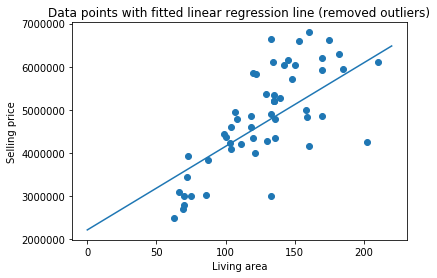

In [ ]:
# Plot of the regression line
xfit2 = np.linspace(0, x_mod.max()+10, 1000)
yfit2 = model.predict(xfit2[:, np.newaxis])

plt.scatter(x_mod, y_mod)
plt.plot(xfit2, yfit2)
plt.title("Data points with fitted linear regression line (removed outliers)")
plt.xlabel("Living area")
plt.ylabel("Selling price")

In [ ]:
## Question 1 b

# Linear regression model
model2 = LinearRegression().fit(x_mod, y_mod)

# Intercept
intercept2=model2.intercept_

# Slope
slope2=model2.coef_

print("Intercept: "+intercept2.astype(str))
print("Slope: "+slope2[0].astype(str))

Intercept: 1809821.2159409611
Slope: 23597.794749444976


In [ ]:
## Question 1 c

preds=[[i, model2.predict([[i]])[0]] for i in [100, 150, 200]]

# just creates Latex table code
df=pd.DataFrame(preds)
df.to_latex(index=False)
preds

[[100, 4169600.6908854586],
 [150, 5349490.428357707],
 [200, 6529380.1658299565]]

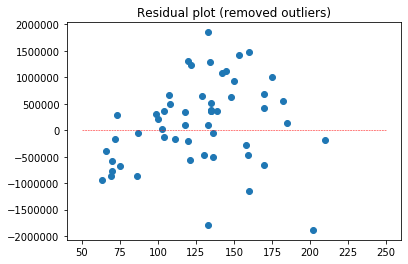

In [ ]:
## Question 1 d (residual plot)
ypred = model.predict(x_mod)
residuals=y_mod-ypred
residuals

# Residual plot
plt.scatter(x_mod, residuals)
plt.plot(np.linspace(50, 250, 1000), np.zeros(1000),'--', linewidth=0.5, c='red')
plt.title("Residual plot (removed outliers)")
plt.show()

In [ ]:
################ QUESTION 2 ################

In [ ]:
from sklearn.datasets import load_iris
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
iris = load_iris()

In [ ]:
# Question a: Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set.

In [ ]:
X = iris.data
y = iris.target
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [ ]:
#Feature Scaling :
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Logistic Regression to the Training set :
# the impact on the results
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_train)
# Predict probabilities
probs_y=classifier.predict_proba(X_train)
### Print results 
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 2          | 0.0        | 0.21          | 0.78      
1          | 1          | 0.05       | 0.73          | 0.22      
0          | 0          | 0.98       | 0.02          | 0.0       
2          | 2          | 0.0        | 0.35          | 0.64      
0          | 2          | 0.0        | 0.04          | 0.96      
2          | 1          | 0.07       | 0.84          | 0.1       
0          | 0          | 0.97       | 0.03          | 0.0       
1          | 2          | 0.0        | 0.45          | 0.55      
1          | 1          | 0.03       | 0.8           | 0.17      
1          | 1          | 0.02       | 0.92          | 0.06      
2          | 2          | 0.0        | 0.07          | 0.93      
1          | 0          | 0.98       | 0.02          | 0.0       
1          | 2          | 0.0        | 0.05          | 0.95      
1       

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[39  0  0]
 [ 0 34  3]
 [ 0  2 42]]


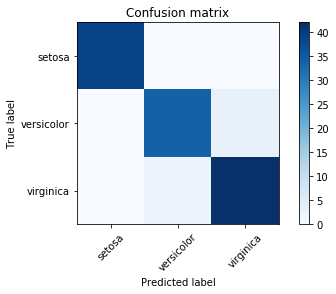

In [ ]:
# Making the Confusion Matrix and plot the confusion matrix
cm = confusion_matrix(y_train, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('cm.png')


# From the confusion matrix we can get infos: the total actual setosa in the dataset is 13, 
# versicolor is 15 and Virginica is 10. The 37 correct prediction, only one mistake prediction.

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.92 0.08]
 [0.   0.05 0.95]]


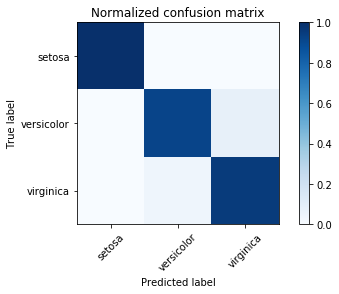

In [ ]:
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

# The accuracy of setosa and versicolor is 100%, excellent! and the accuracy of versicolor is 62%.

# 

In [ ]:
# Question b: Use k-nearest neighbours to classify the iris data set with some different values for k, 
# and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why?

In [ ]:
observations = len(iris.data)
features = len(iris.feature_names)
print("Number of Observations: " + str(observations))
print("Number of Features: " + str(features))
print("")


Number of Observations: 150
Number of Features: 4



In [ ]:
print("Features: ")
for i in iris.feature_names:
	print (i)
print("")

x = iris.data[0:,:2] # Filter just the first two columns (sepal length and sepal width)
y = iris.target

Features: 
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)



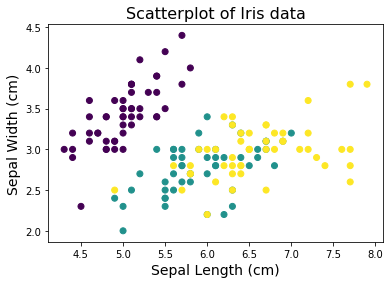

In [ ]:
plt.figure()
plt.scatter(x[0:,0], x[:,1], c=y)
plt.xlabel("Sepal Length (cm)", fontsize=14)
plt.ylabel("Sepal Width (cm)", fontsize=14)
plt.title("Scatterplot of Iris data", fontsize=16)
plt.savefig("sepal-scatterplot.png")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range=range(20,26)
scores={}
scores_list=[]
for k in k_range:
    knn =KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_train)

In [ ]:
print(y_pred)

[2 1 0 2 2 1 0 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2 1 0 2 1 1 1 1
 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2
 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1
 2 1 0 0 0 2 1 2 0]


In [ ]:
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

# The results show that our KNN algorithm was able to classify all the 35 records in the test set with 97% accuracy, 
# which is excellent.

[[39  0  0]
 [ 0 35  2]
 [ 0  2 42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.95      0.95      0.95        37
           2       0.95      0.95      0.95        44

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_test, y_test)
    pred_i = classifier.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
print(error)

[0.0, 0.1, 0.06666666666666667, 0.1, 0.1, 0.16666666666666666, 0.1, 0.13333333333333333, 0.13333333333333333, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


Text(0, 0.5, 'Mean Error')

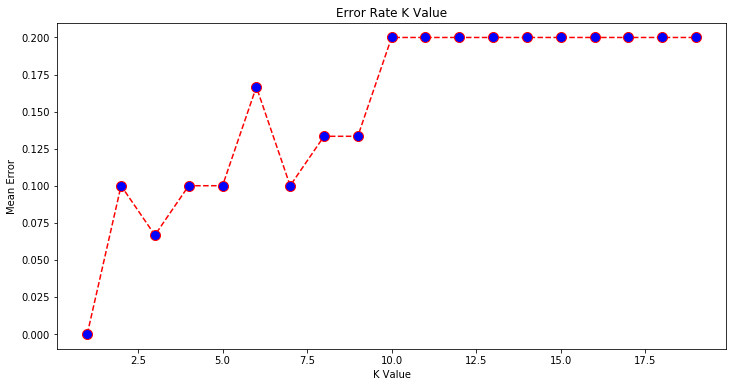

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')